### Project description

You work for the online store Ice, which sells videogames all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. You need to identify patterns that determine whether a game succeeds or not. This allows you to put your money on a potentially hot new item and plan advertising campaigns.

## Step 1 - open data file and study the general information

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

data = pd.read_csv('datasets/games.csv')

In [2]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
data.tail()  #bottom is more likely corrupt. 

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [4]:
data.sample(10)  # 10 random rows

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
5848,Blazing Heroes,SAT,1995.0,Role-Playing,0.00,0.00,0.30,0.00,NaN,NaN,NaN
12453,Daito Giken Koushiki Pachi-Slot Simulator: Oss...,PSP,2006.0,Misc,0.00,0.00,0.06,0.00,NaN,NaN,NaN
14098,Pro Evolution Soccer 2017,X360,2016.0,Sports,0.01,0.02,0.00,0.00,NaN,6.5,E
6760,Classic NES Series: Excitebike,GBA,2004.0,Racing,0.11,0.04,0.10,0.01,66.0,tbd,E
8050,Call of Juarez,X360,2007.0,Shooter,0.14,0.02,0.00,0.01,71.0,6.9,M
6417,Sesame Street: Cookie's Counting Carnival,DS,2010.0,Misc,0.25,0.00,0.00,0.02,NaN,NaN,NaN
15288,18 Wheels of Steel: Extreme Trucker,PC,2009.0,Racing,0.00,0.02,0.00,0.00,NaN,8,NaN
13219,Natural Doctrine,PS3,2014.0,Role-Playing,0.03,0.01,0.01,0.01,NaN,8.1,M
4220,Circus Atari,2600,NaN,Action,0.43,0.03,0.00,0.00,NaN,NaN,NaN
1113,Need for Speed Carbon,X360,2006.0,Racing,0.76,0.69,0.02,0.18,77.0,6.3,E10+


In [5]:
data.shape  #-or- len(data)  #length of columns, same as number of rows

(16715, 11)

In [6]:
data.info()  # easy to see missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [7]:
data.describe()  #shows 0.00000 - 25% is 0.0000

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [8]:
#this specifically looks for zero - many of the games had zero sales in a region
for i in data.columns:
    print(i, len(data[data[i] == 0])) 

Name 0
Platform 0
Year_of_Release 0
Genre 0
NA_sales 4508
EU_sales 5870
JP_sales 10514
Other_sales 6601
Critic_Score 0
User_Score 0
Rating 0


In [9]:
data.describe(include=['object'])  #shows categorical

,Name,Platform,Genre,User_Score,Rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


In [10]:
data.duplicated().sum()  #data.drop_duplicates()

0

In [11]:
data.Platform.value_counts()  #TG16 very old 16-bit, PCFX old 32-bit

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
WS         6
SCD        6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

#### Looking for TBD

In [12]:
data.describe(include=['object'])  #shows categorical -- USER_SCORE IS tbd

,Name,Platform,Genre,User_Score,Rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


In [13]:
print(data.User_Score.value_counts()/len(data)) #tbd is 0.145 %

tbd    0.145019
7.8    0.019384
8      0.017350
8.2    0.016871
8.3    0.015196
         ...   
2.3    0.000120
1      0.000120
9.6    0.000120
0      0.000060
9.7    0.000060
Name: User_Score, Length: 96, dtype: float64


In [14]:
data[data.User_Score == 'tbd']['Year_of_Release'].value_counts() 

2009.0    405
2010.0    331
2008.0    326
2011.0    217
2002.0    192
2007.0    192
2006.0    124
2005.0    121
2004.0    107
2003.0     95
2001.0     82
2000.0     43
2015.0     38
2016.0     34
2012.0     24
2014.0     21
2013.0     15
1999.0      8
1997.0      1
Name: Year_of_Release, dtype: int64

#### Looking at rating

In [15]:
data.Rating.unique() # Use internet to find what a pending rating would be

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [16]:
data.Rating.isna().sum() # 6766 missing - take slice without the missing, ignore or fill, but justify approach
#take slice, I think -- noooo - too much data loss!

6766

### Missing values - Before

In [17]:
def count_missing(vec):
    """counts the number of missing in a vector"""
    #get a vector of true/false values
    #depending on whether the value is missing
    null_vec = pd.isnull(vec)
    null_count = np.sum (null_vec)
    return null_count

def proportion_missing(vec):
    """Percentage of missing numbers in a vector"""
    #numerator : number of missing values
    #we can use the count_missing function above
    num = count_missing(vec)
    
    #denominator: total number of values in the vector
    #we also need to count the missing values
    dem=vec.size
    
    #return the proportion/percentage of missing
    return num / dem

def prop_complete(vec):
    """Percentage of non-missing values in the vector"""
    #use the percent missing function above
    #by subtracting its value from 1
    return 1 - proportion_missing(vec)

countmissing_col = data.apply(count_missing)

percentmissing_col = data.apply(proportion_missing)

percentcomplete_col = data.apply(prop_complete)
 
print(countmissing_col)
print()
print(percentmissing_col)
print()
print(percentcomplete_col)

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Name               0.000120
Platform           0.000000
Year_of_Release    0.016093
Genre              0.000120
NA_sales           0.000000
EU_sales           0.000000
JP_sales           0.000000
Other_sales        0.000000
Critic_Score       0.513192
User_Score         0.400897
Rating             0.404786
dtype: float64

Name               0.999880
Platform           1.000000
Year_of_Release    0.983907
Genre              0.999880
NA_sales           1.000000
EU_sales           1.000000
JP_sales           1.000000
Other_sales        1.000000
Critic_Score       0.486808
User_Score         0.599103
Rating             0.595214
dtype: float64


In [18]:
data.isnull().sum() 
data.notnull().sum() 
data.isnull().any()

Name                True
Platform           False
Year_of_Release     True
Genre               True
NA_sales           False
EU_sales           False
JP_sales           False
Other_sales        False
Critic_Score        True
User_Score          True
Rating              True
dtype: bool

In [19]:
#will show each column with missing - half of the data has missing somewhere
data[data.isnull().any(axis=1)] # look at each column

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [20]:
#data = data[data.notnull().all(axis=1)].reset_index() # 7878 rows x 11 columns of "clean data" without missing values

In [21]:
data[data.notnull().all(axis=1)] # 7878 rows vs. 16,715 rows
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


### Replace the column names (make them lowercase).

In [22]:
#reusable anywhere to improve column names
def to_clean(val):
    return val.strip().lower().replace(" ", "_")
data = data.rename(columns=to_clean)

In [23]:
data.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E


In [24]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


### Convert the data to the required types

https://en.wikipedia.org/wiki/Entertainment_Software_Rating_Board

RP represents Rating Pending. There are currently only 3 marked RP. I will fillna(RP).

In [25]:
data.rating = data.rating.fillna('RP')
#data

In [26]:
#year of release is a float because of NaN - need to fillna() or drop - 269 missing=0.016  
data['year_of_release'] = data['year_of_release'].fillna(0)    

In [27]:
data['year_of_release'] = data['year_of_release'].apply(int) 

In [28]:
data['user_score'].apply(type).unique() #contains strings and floats 

array([<class 'str'>, <class 'float'>], dtype=object)

In [29]:
data['user_score'] = data['user_score'].replace('tbd',np.nan)     # cant do calculate on strings      
#data 

In [30]:
data['user_score'] = data['user_score'].fillna(0)           
#data 

In [31]:
data['user_score'] = data['user_score'].astype('float')

In [32]:
data.groupby(['genre'])['critic_score'].mean() #gives average critic score to fill missing values

genre
Action          66.629101
Adventure       65.331269
Fighting        69.217604
Misc            66.619503
Platform        68.058350
Puzzle          67.424107
Racing          67.963612
Role-Playing    72.652646
Shooter         70.181144
Simulation      68.619318
Sports          71.968174
Strategy        72.086093
Name: critic_score, dtype: float64

In [33]:
data['critic_score'].fillna(data.groupby(['genre'])['critic_score'].transform('mean'), inplace=True)

In [34]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.000000,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,68.058350,0.0,RP
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.000000,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.000000,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,72.652646,0.0,RP


### Observation on data types

User score is messy - NaN are float, tbd is a string, values are float.
Critic score, user score and rating are missing for 40% or 6700 rows. All 3 are missing in the same rows. Too much to delete. - True!

Year of release is a float because of NaN. Filled with zero to complete calculations. Changed to int. because year is a whole number.

### Observation on 'tbd'

Leave tbd as-is - We are concerned with planning for 2017. Most years with tbd are old and outside of scope.

Can not leave - can't do calculations on a string.

### Observation on critic score

Similar to other missing values - too much information missing, decided to fill with mean of critic scores.

### Missing values - After

In [35]:
# reusable code that finds missing by count, percentage and percent complete

def count_missing(vec):
    """counts the number of missing in a vector"""
    #get a vector of true/false values
    #depending on whether the value is missing
    null_vec = pd.isnull(vec)
    null_count = np.sum (null_vec)
    return null_count

def proportion_missing(vec):
    """Percentage of missing numbers in a vector"""
    #numerator : number of missing values
    #we can use the count_missing function above
    num = count_missing(vec)
    
    #denominator: total number of values in the vector
    #we also need to count the missing values
    dem=vec.size
    
    #return the proportion/percentage of missing
    return num / dem

def prop_complete(vec):
    """Percentage of non-missing values in the vector"""
    #use the percent missing function above
    #by subtracting its value from 1
    return 1 - proportion_missing(vec)

countmissing_col = data.apply(count_missing)

percentmissing_col = data.apply(proportion_missing)

percentcomplete_col = data.apply(prop_complete)
 
print(countmissing_col)
print()
print(percentmissing_col)
print()
print(percentcomplete_col)

name               2
platform           0
year_of_release    0
genre              2
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       2
user_score         0
rating             0
dtype: int64

name               0.00012
platform           0.00000
year_of_release    0.00000
genre              0.00012
na_sales           0.00000
eu_sales           0.00000
jp_sales           0.00000
other_sales        0.00000
critic_score       0.00012
user_score         0.00000
rating             0.00000
dtype: float64

name               0.99988
platform           1.00000
year_of_release    1.00000
genre              0.99988
na_sales           1.00000
eu_sales           1.00000
jp_sales           1.00000
other_sales        1.00000
critic_score       0.99988
user_score         1.00000
rating             1.00000
dtype: float64


### Total Sales, save in new column

In [36]:
#call out specific columns and sum
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1) 

In [37]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.000000,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,68.058350,0.0,RP,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.000000,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.000000,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,72.652646,0.0,RP,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,66.629101,0.0,RP,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,71.968174,0.0,RP,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,65.331269,0.0,RP,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,68.058350,0.0,RP,0.01


## Step 3 Analyze the data

#### Look at how many games were released in different years. Is the data for every period significant?

In [38]:
df = data[['year_of_release', 'name']].groupby('year_of_release').count().sort_values(by='year_of_release').reset_index() # if create new dataframe - RESET INDEX
#df

In [39]:
df = df[df['year_of_release'] != 0] #one way to drop the 0 year of release
#df

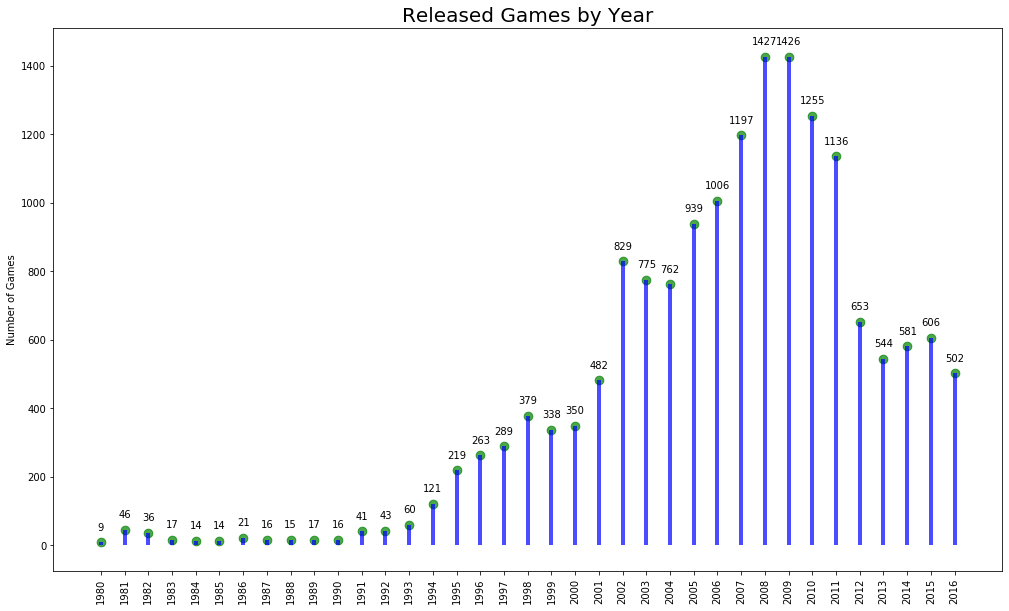

In [40]:
fig, ax = plt.subplots(figsize=(17, 10))
ax.vlines(x=df.year_of_release, ymin=0, ymax=df.name, color='blue', alpha=0.7, linewidth=4)
ax.scatter(x=df.year_of_release, y=df.name, s=75, color='green', alpha=0.7)

ax.set_title('Released Games by Year', size=20)
ax.set_ylabel('Number of Games')
ax.set_xticks(df.year_of_release)
ax.set_xticklabels(df.year_of_release, rotation=90)

for row in df.itertuples():
    ax.text(row.year_of_release, row.name+30, s=round(row.name, 2), 
            horizontalalignment='center', verticalalignment='bottom')

<div style="border:solid green 4px; padding: 20px">Neat and pretty chart, no questions.</div>

### Conclusion:

This is the best, clearest representation I could find. https://seaborn.pydata.org/examples/index.html
    
The data for every period is not significant. The number of games sold before 2000 is very small compared to games sold after 2000. It makes sense to focus on games sold after 2000. 

2008 and 2009 are peak years for game sales, followed by 2008, 2010 and 2011. Something interesting happened in this 5 year period. Next, lets look at platforms.

<div style="border:solid green 4px; padding: 20px">I wonder how come that 2012 sales are almost two times less than 2011.</div>

### Investigate what platforms were popular in what years.  

In [98]:
df = data[['platform', 'total_sales']].groupby('platform').sum().sort_values(by='total_sales').reset_index() 
#df 

#### Look at how sales varied from platform to platform. 

z-score - how far from the average revenue, or the mean - clean statistical method

In [42]:
#look for platforms above the mean
df['sales_z']= (df['total_sales']-df['total_sales'].mean())/df['total_sales'].std() 
df

,platform,total_sales,sales_z
0,PCFX,0.03,-0.825980
1,GG,0.04,-0.825952
2,3DO,0.10,-0.825779
3,TG16,0.16,-0.825607
4,WS,1.42,-0.821988
5,NG,1.44,-0.821931
6,SCD,1.86,-0.820724
7,DC,15.95,-0.780254
8,GEN,30.77,-0.737688
9,SAT,33.59,-0.729588


#### Choose platform with greatest total sales and build a distribution based on data for each year.

###### diverging bar plot shows relationship between platform & sales

In [43]:
#red bars for revenues below the mean, green bars for revenue above the mean
df['colors']=['red' if x < 0 else 'green' for x in df['sales_z']]
df # assigns colors for each row

,platform,total_sales,sales_z,colors
0,PCFX,0.03,-0.825980,red
1,GG,0.04,-0.825952,red
2,3DO,0.10,-0.825779,red
3,TG16,0.16,-0.825607,red
4,WS,1.42,-0.821988,red
5,NG,1.44,-0.821931,red
6,SCD,1.86,-0.820724,red
7,DC,15.95,-0.780254,red
8,GEN,30.77,-0.737688,red
9,SAT,33.59,-0.729588,red


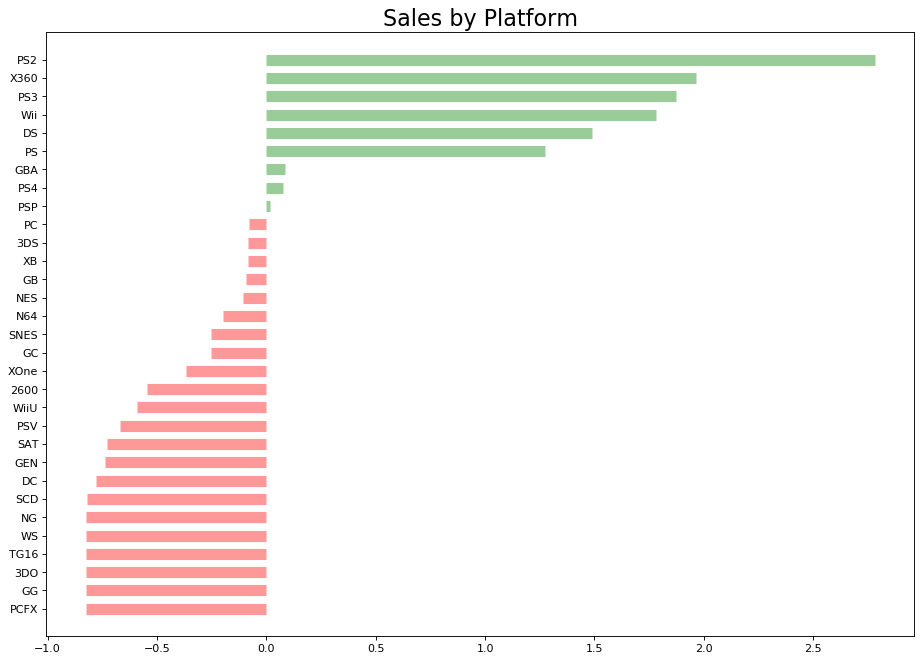

In [44]:
fig, ax = plt.subplots(figsize=(14, 10),dpi=80)
ax.set_title('Sales by Platform', size=20)
plt.hlines(y=df.platform, xmin=0, xmax=df.sales_z, color=df.colors, alpha=0.4, linewidth=10)

### Conclusion:

Playstation 2 and X Box 360 are definitely the leaders in sales. I looked up the bottom platforms and in general, they are very old. Some are 16-bit, some are 32-bit. Definitely 2D. This information strongly supports the previous chart and earlier conclusion to focus on games and platforms after 2000.

Xbox 360 = Microsoft
Playstation = Sony
Wii, GBA - Nintendo

The top selling platforms are made by 3 companies, which suggests these will be the growing platforms.

##### which platforms are leading in sales? which are growing and shrinking? select several potentially profitable platforms.

In [45]:
!pip install squarify
import squarify

In [46]:
df_tree = data[['platform', 'total_sales']].groupby('platform').sum().sort_values(by='total_sales').reset_index()

In [47]:
#df_tree

In [48]:
sizes = df_tree.total_sales.values.tolist()
#sizes

In [49]:
labels=df_tree.apply(lambda x: str(x[0])+ "\n"+"$"+str(round(x[1])), axis=1 )
#labels

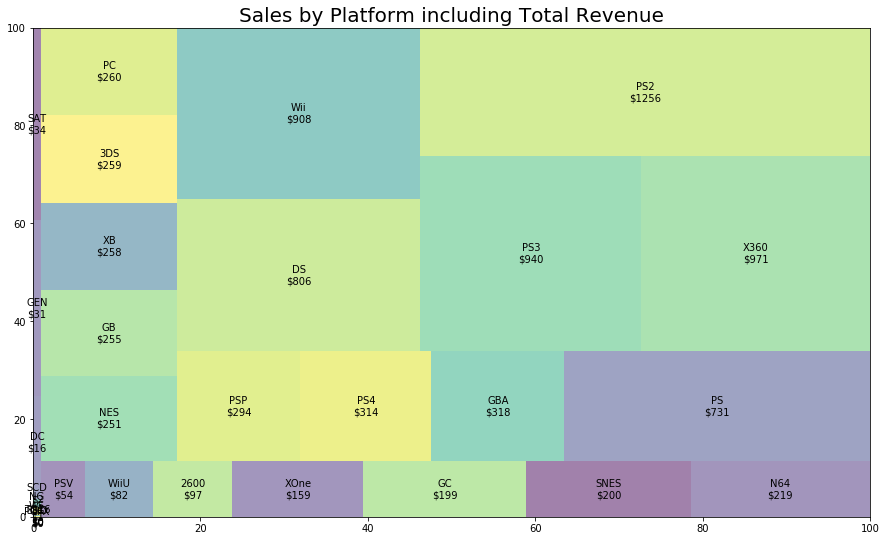

In [50]:
fig, ax = plt.subplots(figsize=(15,9))
ax.set_title('Sales by Platform including Total Revenue', size=20)
squarify.plot(sizes=sizes, label=labels, alpha=0.5)

### Conclusion:

This is an excellent graphical representation that clearly shows what I had researched online. Microsoft, Sony and Nintendo are the largest platforms with the most sales. It is also interesting to note the similarity of the previous generation of games and revenue. That was not as obvious in the previous chart.

#### Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a prognosis for 2017.

#### How long does it generally take for new platforms to appear and old ones to fade?

### Conclusion:

The top 3 manufacturers significantly outperform any others. Playstation, Wii and Xbox 360 are the largest platforms by  number of games sold and total revenue. There appears to be a 5 year cycle for new platforms to appear. This also corresponds with the technology the platforms run on.

Data after 2000 should be the focus of further research.

In [51]:
data_new=data[data.year_of_release>2000]

In [52]:
df=pd.pivot_table(data_new, index='year_of_release', columns='platform', values='total_sales', aggfunc=sum, fill_value=0 )
df.head()

platform,3DS,DC,DS,GB,GBA,GC,N64,PC,PS,PS2,PS3,PS4,PSP,PSV,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,
2001,0.0,1.07,0.00,9.24,61.53,26.34,3.25,5.47,35.59,166.43,0.0,0.0,0.00,0.0,0.28,0.0,0.0,0.00,22.26,0.0
2002,0.0,0.29,0.00,0.00,74.16,51.81,0.08,8.57,6.67,205.38,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,48.01,0.0
2003,0.0,0.00,0.00,0.00,56.67,50.61,0.00,8.84,2.07,184.31,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,55.04,0.0
2004,0.0,0.00,17.27,0.00,77.91,28.82,0.00,10.39,0.00,211.81,0.0,0.0,7.06,0.0,0.00,0.0,0.0,0.00,65.42,0.0
2005,0.0,0.00,130.14,0.00,33.86,27.62,0.00,4.37,0.00,160.66,0.0,0.0,43.84,0.0,0.00,0.0,0.0,8.25,49.08,0.0


In [53]:
df.shift(+1).head()

platform,3DS,DC,DS,GB,GBA,GC,N64,PC,PS,PS2,PS3,PS4,PSP,PSV,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,
2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002,0.0,1.07,0.00,9.24,61.53,26.34,3.25,5.47,35.59,166.43,0.0,0.0,0.00,0.0,0.28,0.0,0.0,0.0,22.26,0.0
2003,0.0,0.29,0.00,0.00,74.16,51.81,0.08,8.57,6.67,205.38,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,48.01,0.0
2004,0.0,0.00,0.00,0.00,56.67,50.61,0.00,8.84,2.07,184.31,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,55.04,0.0
2005,0.0,0.00,17.27,0.00,77.91,28.82,0.00,10.39,0.00,211.81,0.0,0.0,7.06,0.0,0.00,0.0,0.0,0.0,65.42,0.0


In [54]:
df.tail() #to show how much revenue shifted

platform,3DS,DC,DS,GB,GBA,GC,N64,PC,PS,PS2,PS3,PS4,PSP,PSV,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,
2012,51.36,0.0,11.01,0.0,0.0,0.0,0.0,23.22,0.0,0.0,107.36,0.00,7.69,16.19,0.0,21.71,17.56,99.74,0.0,0.00
2013,56.57,0.0,1.54,0.0,0.0,0.0,0.0,12.38,0.0,0.0,113.25,25.99,3.14,10.59,0.0,8.59,21.65,88.58,0.0,18.96
2014,43.76,0.0,0.00,0.0,0.0,0.0,0.0,13.28,0.0,0.0,47.76,100.00,0.24,11.90,0.0,3.75,22.03,34.74,0.0,54.07
2015,27.78,0.0,0.00,0.0,0.0,0.0,0.0,8.52,0.0,0.0,16.82,118.90,0.12,6.25,0.0,1.14,16.35,11.96,0.0,60.14
2016,15.14,0.0,0.00,0.0,0.0,0.0,0.0,5.25,0.0,0.0,3.60,69.25,0.00,4.25,0.0,0.18,4.60,1.52,0.0,26.15


In [55]:
dynamics=df-df.shift(+1)
dynamics

platform,3DS,DC,DS,GB,GBA,GC,N64,PC,PS,PS2,PS3,PS4,PSP,PSV,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,
2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002,0.00,-0.78,0.00,-9.24,12.63,25.47,-3.17,3.10,-28.92,38.95,0.00,0.00,0.00,0.00,-0.28,0.00,0.00,0.00,25.75,0.00
2003,0.00,-0.29,0.00,0.00,-17.49,-1.20,-0.08,0.27,-4.60,-21.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.03,0.00
2004,0.00,0.00,17.27,0.00,21.24,-21.79,0.00,1.55,-2.07,27.50,0.00,0.00,7.06,0.00,0.00,0.00,0.00,0.00,10.38,0.00
2005,0.00,0.00,112.87,0.00,-44.05,-1.20,0.00,-6.02,0.00,-51.15,0.00,0.00,36.78,0.00,0.00,0.00,0.00,8.25,-16.34,0.00
2006,0.00,0.00,-10.33,0.00,-28.58,-16.36,0.00,-1.52,0.00,-57.24,20.96,0.00,11.48,0.00,0.00,137.15,0.00,43.37,-39.04,0.00
2007,0.00,0.02,27.13,0.00,-1.88,-10.99,0.00,6.43,0.00,-27.43,52.23,0.00,-8.39,0.00,0.00,15.62,0.00,43.79,-9.49,0.00
2008,0.00,0.02,-1.63,0.00,-3.40,-0.27,0.00,3.14,0.00,-22.09,45.33,0.00,-12.38,0.00,0.00,18.55,0.00,39.85,-0.37,0.00
2009,0.00,-0.04,-25.77,0.00,0.00,0.00,0.00,4.49,0.00,-27.50,12.41,0.00,3.23,0.00,0.00,35.65,0.00,-14.97,-0.18,0.00


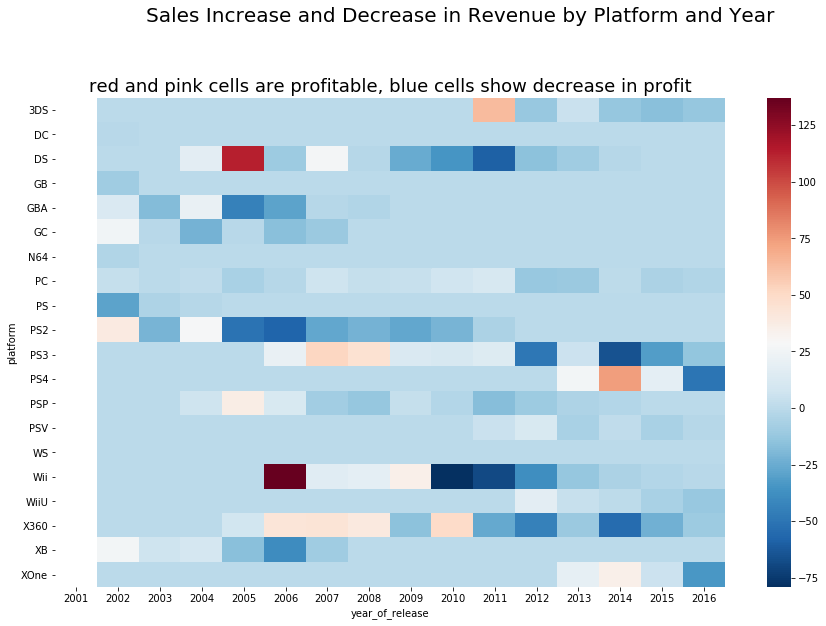

In [56]:
fig, ax = plt.subplots(figsize=(15,9))
fig.suptitle('Sales Increase and Decrease in Revenue by Platform and Year', size=20, y=1.02)
ax.set_title('red and pink cells are profitable, blue cells show decrease in profit', size=18)
sns.heatmap(dynamics.T, cmap='RdBu_r')

### Conclusion:

Nintendo Wii in 2006 was extremely profitable, the previous year the Nintendo DS was the most profitable. Somehow, these two are also the worst performing in 2010 and 2011.

#### Use boxplot to compare average sales on various platforms. Upper whisker is maximum income. Compare which platform is new, which is old. 

In [57]:
grouped=data_new.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()
#grouped

In [58]:
ordered=grouped.groupby(['platform'])['total_sales'].sum().sort_values().reset_index()['platform']
#ordered

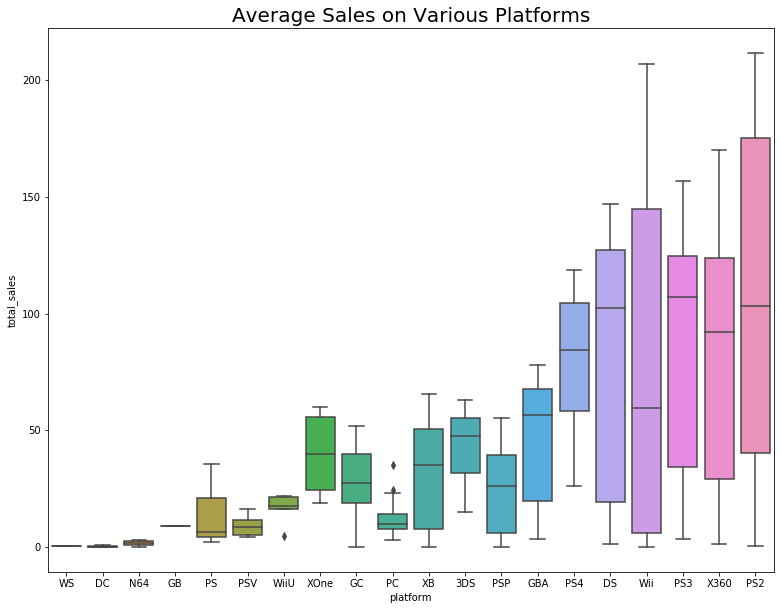

In [59]:
fig, ax = plt.subplots(figsize=(13,10))
ax.set_title('Average Sales on Various Platforms', size=20)
sns.boxplot(x='platform', y='total_sales', data=grouped, order=ordered)

### Conclusion:

The highest whisker in the entire chart is the Nintendo Wii, again reflecting an extremely high profit in sales, as noted in the previoous chart. The PS2 is the next highest profit shown by the whisker, but note the median. Overall higher than the Wii with higher sales overall. The Wii falls behind the Xbox 360 and the PS2 when observing the median sales. Overall this chart still shows Wii, Xbox 360 and PS2 as the leaders in revenue. 

The PS3 did not do as well as the PS2, but still a strong contender along with the Nintendo DS. All other platforms are older and have much less in terms of total sales.

Links about the history and evolution of platforms and games:
https://www.history.com/topics/inventions/history-of-video-games#section_2

https://techcrunch.com/2015/10/31/the-history-of-gaming-an-evolving-community/

#### Look at how reviews affect sales for a popular platform. Build a scatterplot, calculate correlation between reviews and sales.

In [60]:
data_2000=data[data.year_of_release>2000]
#data_2000

In [61]:
data_2000['critic_score'].corr(data_2000['user_score'])

0.2710430779677272

In [62]:
data_2000['critic_score'].corr(data_2000['total_sales'])

0.22420707598000317

In [63]:
data_2000['user_score'].corr(data_2000['total_sales'])

0.1797848425601347

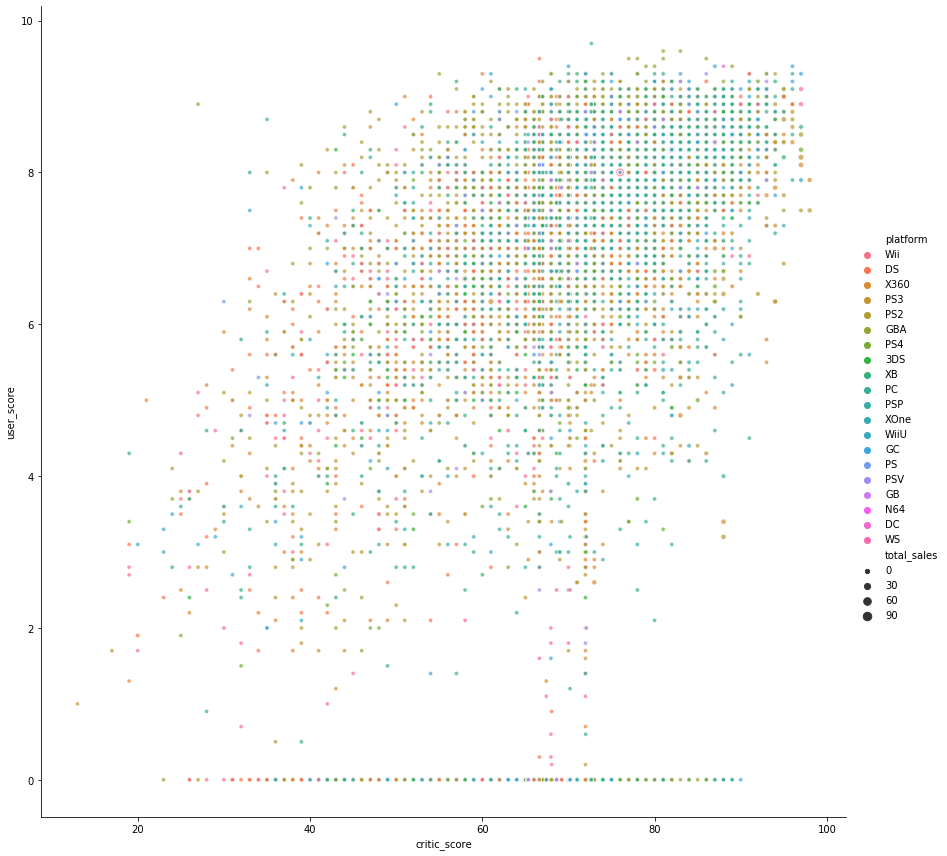

In [97]:
res = sns.relplot(data=data_2000, 
                  x="critic_score", y="user_score", 
                  hue="platform", size="total_sales", 
                  alpha=0.7, height=12)

### Conclusion:

There is definitely a correlation between a higher critic score and a higher user score, noting the increase in density of the dots in the upper right.

#### Games by genre. Genres with high and low sales. make diverging bar plot and z_score

In [65]:
df_genre = data[['genre', 'total_sales']].groupby('genre').sum().sort_values(by='total_sales').reset_index() 
#df_genre 

In [66]:
df_genre['genre_z']= (df_genre['total_sales']-df_genre['total_sales'].mean())/df_genre['total_sales'].std() 
#df_genre

In [67]:
#red bars for revenues below the mean, green bars for revenue above the mean
df_genre['colors']=['red' if x < 0 else 'green' for x in df_genre['genre_z']]
#df_genre # assigns colors for each row

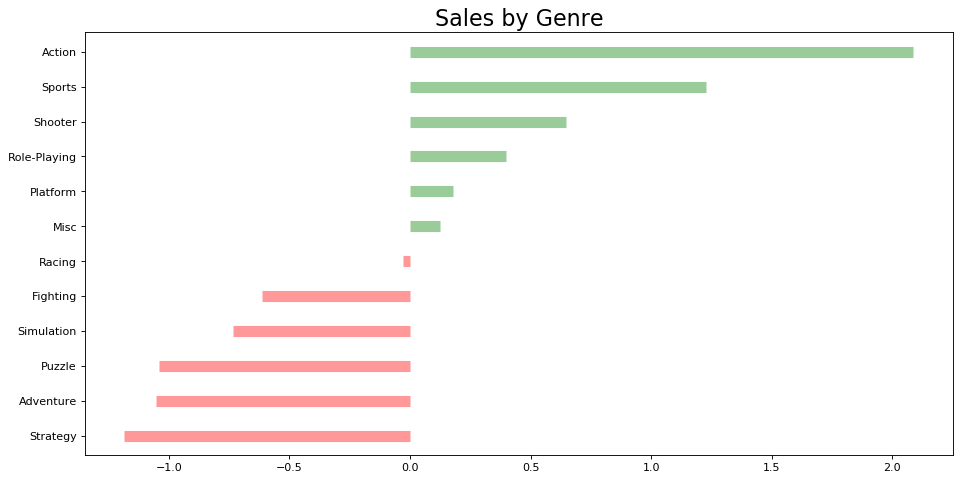

In [68]:
fig, ax = plt.subplots(figsize=(14, 7),dpi=80)
ax.set_title('Sales by Genre', size=20)
plt.hlines(y=df_genre.genre, xmin=0, xmax=df_genre.genre_z, color=df_genre.colors, alpha=0.4, linewidth=10)

#### Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?

### Conclusion:

Action and Sports are the most popular and profitable genres. Adventure and Strategy are the least profitable.

## Step 4 Create a user profile for each region.

#### top 5 platforms, genre, ratings by region

##### North America

In [69]:
df_na = data_2000[['platform', 'na_sales']].groupby('platform').sum().sort_values(by='na_sales').reset_index() 

In [70]:
df_na_genre = data_2000[['genre', 'na_sales']].groupby('genre').sum().sort_values(by='na_sales').reset_index() 

In [71]:
df_na_rate = data_2000[['rating', 'na_sales']].groupby('rating').sum().sort_values(by='na_sales').reset_index() 

##### Europe

In [72]:
df_eu = data_2000[['platform', 'eu_sales']].groupby('platform').sum().sort_values(by='eu_sales').reset_index() 

In [73]:
df_eu_genre = data_2000[['genre', 'eu_sales']].groupby('genre').sum().sort_values(by='eu_sales').reset_index() 

In [74]:
df_eu_rate = data_2000[['rating', 'eu_sales']].groupby('rating').sum().sort_values(by='eu_sales').reset_index() 

##### Japan

In [75]:
df_jp = data_2000[['platform', 'jp_sales']].groupby('platform').sum().sort_values(by='jp_sales').reset_index() 

In [76]:
df_jp_genre = data_2000[['genre', 'jp_sales']].groupby('genre').sum().sort_values(by='jp_sales').reset_index() 

In [77]:
df_jp_rate = data_2000[['rating', 'jp_sales']].groupby('rating').sum().sort_values(by='jp_sales').reset_index() 

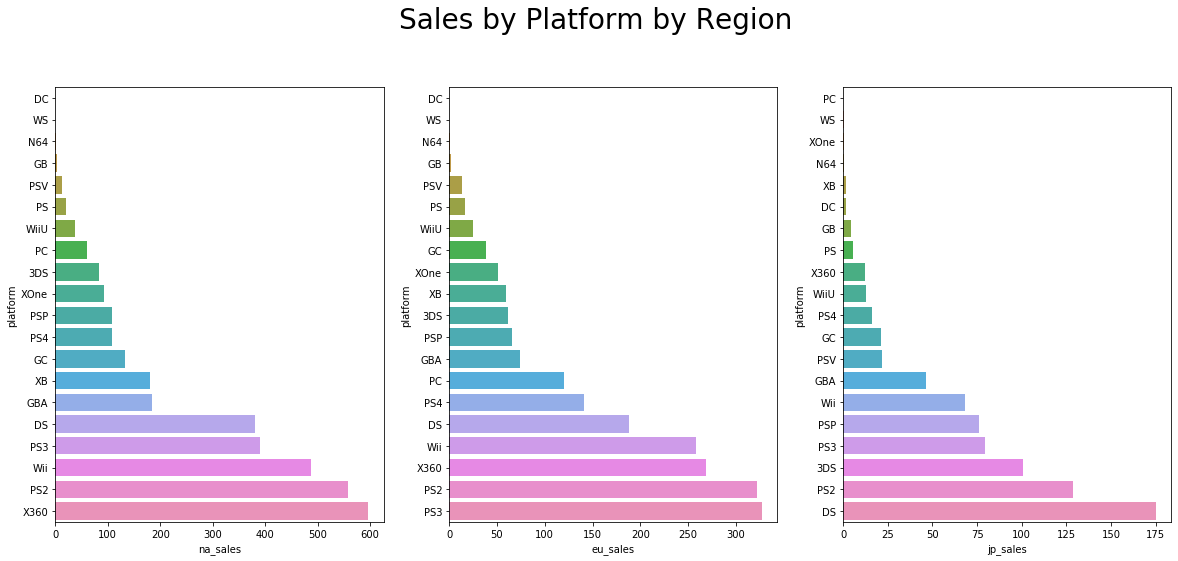

In [78]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 8))
fig.suptitle('Sales by Platform by Region', size=28, y=1.02)
sns.barplot(y=df_na.platform, x=df_na.na_sales, data=df_na, ax=ax1)                                              
sns.barplot(y=df_eu.platform, x=df_eu.eu_sales, data=df_eu, ax=ax2)
sns.barplot(y=df_jp.platform, x=df_jp.jp_sales, data=df_jp, ax=ax3)

Conclusion: North America is consistent with the boxplot and Wii, PS2 and Xbox 360 are the leaders. Europe favors the PS3 over the Wii, and prefers the PS2 and PS3 over any. In Japan, the Nintendo DS and 3DS are 1 and 3, with the PS2 at number 2. The 3DS is a minor platform in the other two regions.

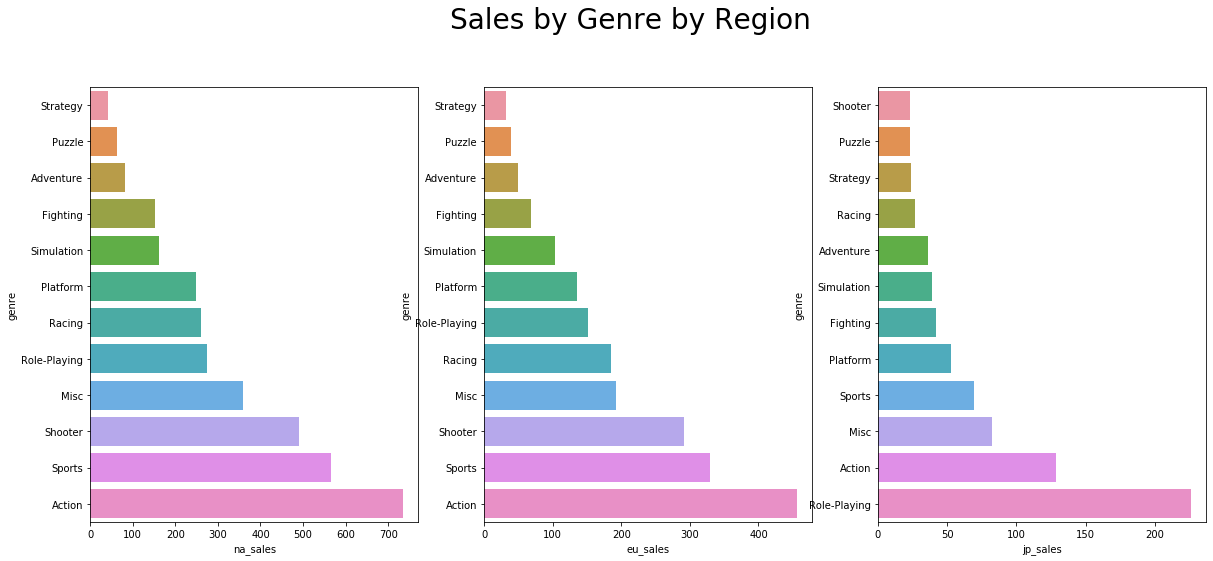

In [79]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 8))
fig.suptitle('Sales by Genre by Region', size=28, y=1.02)
sns.barplot(y=df_na_genre.genre, x=df_na_genre.na_sales, data=df_na_genre, ax=ax1)
sns.barplot(y=df_eu_genre.genre, x=df_eu_genre.eu_sales, data=df_eu_genre, ax=ax2)
sns.barplot(y=df_jp_genre.genre, x=df_jp_genre.jp_sales, data=df_jp_genre, ax=ax3)

North America and Europe have nearly identical tastes for the top 4 sales by genre. Japan strongly prefers role-playing games where this is only a middle source of revenue in North America and Europe. Action is number 2 in Japan, making it the overall genre with the highest revenue.

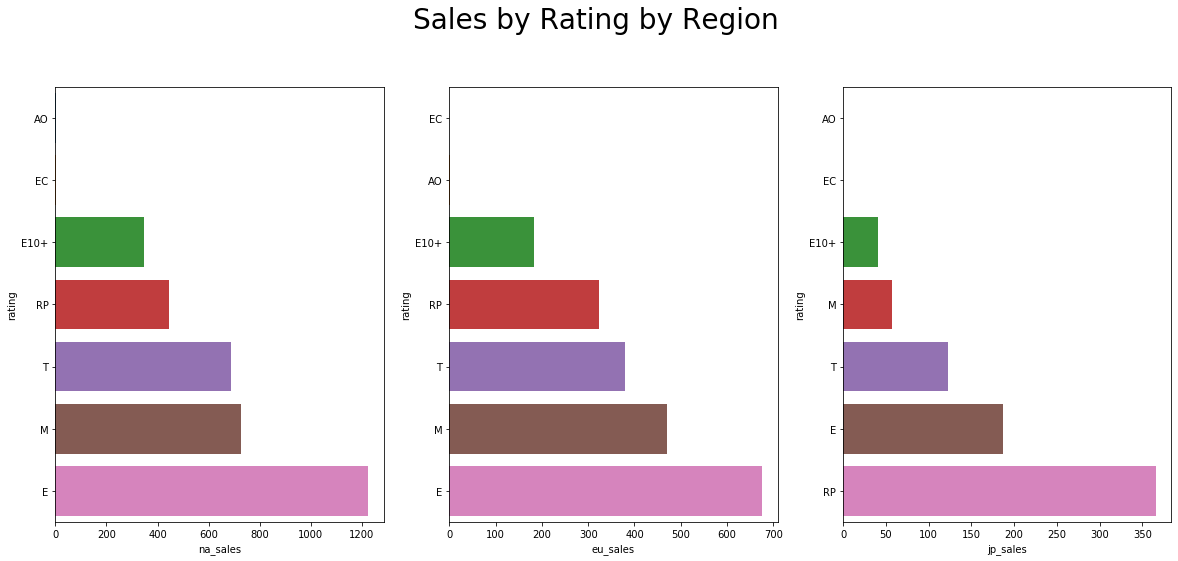

In [80]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 8))
fig.suptitle('Sales by Rating by Region', size=28, y=1.02)
sns.barplot(y=df_na_rate.rating, x=df_na_rate.na_sales, data=df_na_rate, ax=ax1)
sns.barplot(y=df_eu_rate.rating, x=df_eu_rate.eu_sales, data=df_eu_rate, ax=ax2)
sns.barplot(y=df_jp_rate.rating, x=df_jp_rate.jp_sales, data=df_jp_rate, ax=ax3)

"E for Everyone" is the most popular in North America and Europe. M for Mature and T for Teen are 2 and 3 for North America and Europe. This matches the conclusions drawn above about sales by genre. Japan has the highest "Rating Pending", followed by "E for Everyone".

### Conclusion:

Region is definitely a factor in sales by platform, genre and rating. Noting the scale across the bottom, North America has twice as many sales as Europe, and Europe has twice as many sales as Japan.

## Step 5 Hypothesis

Ho Null Hypothesis: average user ratings XBox One and PC platforms are the same.

H1 Alternative Hypothesis: average user ratings XBox One and PC platforms are different.

In [81]:
x_one = data_2000[data_2000['platform']=='XOne'].reset_index()
#x_one

In [82]:
pc = data_2000[data_2000['platform']=='PC'].reset_index()
#pc

In [83]:
np.mean(x_one['user_score'])

4.805263157894736

In [84]:
np.mean(pc['user_score'])

5.620219780219792

In [85]:
sample_user_score_pc = pc['user_score'].sample(200)
#sample_user_score_pc

In [86]:
sample_user_score_x_one = x_one['user_score'].sample(200)
#sample_user_score_x_one

In [87]:
stats.ttest_ind(sample_user_score_pc,
                sample_user_score_x_one)

Ttest_indResult(statistic=2.300087554740853, pvalue=0.021959905093220534)

In [88]:
alpha = .05 # critical statistical significance

results = stats.ttest_ind(sample_user_score_pc,
                        sample_user_score_x_one)

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")

p-value:  0.021959905093220534
We reject the null hypothesis


### Conclusion:

Average user ratings XBox One and PC platforms are not the same. Looking over all of the previous work, Xbox One and PC are very similar in most of the other metrics, so it is odd that average user ratings are not the same also. This may have to do with so many missing values.

#### Hypothesis 2

Ho Null Hypothesis:average user ratings Action and Sports genres are the same
    
H1 Alternative Hypothesis: average user ratings Action and Sports genres are different

In [89]:
action = data_2000[data_2000['genre']=='Action'].reset_index()
#action

In [90]:
np.mean(action['user_score']) 

4.098352553542008

In [91]:
sample_user_score_action = action['user_score'].sample(150)
#sample_user_score_action

In [92]:
sports = data_2000[data_2000['genre']=='Sports'].reset_index()
#sports

In [93]:
np.mean(sports['user_score'])

3.8983667017913595

In [94]:
sample_user_score_sports = sports['user_score'].sample(150)
#sample_user_score_sports

In [95]:
stats.ttest_ind(sample_user_score_sports,
                sample_user_score_action)

Ttest_indResult(statistic=-0.6012346813535892, pvalue=0.5481407504344049)

In [96]:
alpha = .05 # critical statistical significance

results = stats.ttest_ind(sample_user_score_sports,
                        sample_user_score_action)

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")

p-value:  0.5481407504344049
We can't reject the null hypothesis


### Conclusion

Average user ratings Action and Sports genres are the same. Considering the data we have analyzed about genre and region and action and sports having the greatest revenue in North America and Europe, it is not surprising that user ratings are the same.

## Step 6 Write a general conclusion

To forecast for 2017, I recommend focusing effort and spending in North America. Action and Sports titles are the most popular. Platforms are Xbox 360, Wii and PS2. New platforms appear in 5 year cycles, it would be good to find where we currently are relative to that. New platforms are due out in 2020, but I think I could use this notebook, read in the updated values and forecast for 2021.